In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rd2 = pd.read_csv('condensed_rd2.csv')
rd3 = pd.read_csv('condensed_rd3.csv')

In [3]:
rd2.head()

,childid,zwfa,zhfa,zbfa,caredu,wi_new,hq_new,sv_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,levlread,levlwrit,z_ppvt,shenv1,shecon1,shecon3
0,ET010001,-1.60,-0.78,-1.77,8,0.751852,0.555556,1.00,0.7,1,1,1,1,,,0.126715,0,0,0
1,ET010002,-2.42,-2.24,-1.46,8,0.494444,0.333333,0.75,0.4,1,1,1,0,,,0.207348,0,1,0
2,ET010004,-1.00,-1.91,0.41,10,0.565873,0.547619,0.75,0.4,1,0,1,1,,,-0.115184,0,0,0
3,ET010005,-1.40,-1.31,-0.82,0,0.361111,0.283333,0.50,0.3,1,0,1,0,,,0.126715,0,0,0
4,ET010006,-1.29,-0.57,-1.45,11,0.495679,0.287037,0.50,0.7,0,0,1,1,,,-0.034551,0,0,0


In [4]:
# First try implementing for Round 2 for livestock shock

In [5]:
rd2 = rd2.set_index('childid')

In [6]:
rd3 = rd3.set_index('childid')

In [7]:
covariates2 = rd2.iloc[:, :12]
treatment2 = rd2['shecon3']
outcome2 = rd2['z_ppvt']

## Multivariate Regression with Shock: Death of Livestock

$ \textbf{Baseline: Linear Model} $

In [8]:
X2 = rd2.iloc[:, :12].drop(['wi_new', 'sv_new'], axis=1)
X2['shecon3'] = rd2['shecon3']
X2

,zwfa,zhfa,zbfa,caredu,hq_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,shecon3
childid,,,,,,,,,,,
ET010001,-1.60,-0.78,-1.77,8,0.555556,0.7,1,1,1,1,0
ET010002,-2.42,-2.24,-1.46,8,0.333333,0.4,1,1,1,0,0
ET010004,-1.00,-1.91,0.41,10,0.547619,0.4,1,0,1,1,0
ET010005,-1.40,-1.31,-0.82,0,0.283333,0.3,1,0,1,0,0
ET010006,-1.29,-0.57,-1.45,11,0.287037,0.7,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
ET200096,-2.46,-1.78,-1.87,0,0.527778,0.0,1,0,0,0,0
ET200097,-2.21,-2.58,-0.65,0,0.533333,0.0,0,0,0,0,1
ET200098,-0.88,-2.64,1.31,0,0.280303,0.1,0,1,0,0,0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [10]:
# Fit a linear model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, outcome2, test_size=0.15)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

0.22746117052543458

In [11]:
model2.coef_

array([ 0.66053328, -0.38747625, -0.40261129,  0.00941762,  0.23808884,
        0.7710838 , -0.00797517,  0.06549661,  0.39163351,  0.36353831,
       -0.09939001])

In [12]:
coef_2 = pd.DataFrame(model2.coef_)
coef_2.index = X2.columns
coef_2.rename(columns={0:'Rd 2 Coefficients'})

,Rd 2 Coefficients
zwfa,0.660533
zhfa,-0.387476
zbfa,-0.402611
caredu,0.009418
hq_new,0.238089
cd_new,0.771084
drwaterq_new,-0.007975
toiletq_new,0.065497
elecq_new,0.391634
cookingq_new,0.363538


In [13]:
# Fit a linear model
X3 = rd3.iloc[:, :12].drop('wi_new', axis=1)
X3['shecon3'] = rd3['shecon3']
outcome3 = rd3['z_ppvt']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, outcome3, test_size=0.15)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
model3.score(X3_test, y3_test)

0.3414664478122892

In [52]:
coef_3 = pd.DataFrame(model3.coef_)
coef_3.index = X3.columns
coef_3 = coef_3.rename(columns={0:'Rd 3 Coefficients'})

In [53]:
X2

,zwfa,zhfa,zbfa,caredu,hq_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,shecon3
childid,,,,,,,,,,,
ET010001,-1.60,-0.78,-1.77,8,0.555556,0.7,1,1,1,1,0
ET010002,-2.42,-2.24,-1.46,8,0.333333,0.4,1,1,1,0,0
ET010004,-1.00,-1.91,0.41,10,0.547619,0.4,1,0,1,1,0
ET010005,-1.40,-1.31,-0.82,0,0.283333,0.3,1,0,1,0,0
ET010006,-1.29,-0.57,-1.45,11,0.287037,0.7,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
ET200096,-2.46,-1.78,-1.87,0,0.527778,0.0,1,0,0,0,0
ET200097,-2.21,-2.58,-0.65,0,0.533333,0.0,0,0,0,0,1
ET200098,-0.88,-2.64,1.31,0,0.280303,0.1,0,1,0,0,0


In [57]:
print('Average Treatment Effect: ', coef_3.loc['shecon3', 'Rd 3 Coefficients'])

Average Treatment Effect:  -0.20406416939370317


$ \textbf{Rubin Causal Model / Potential Outcomes Framework} $

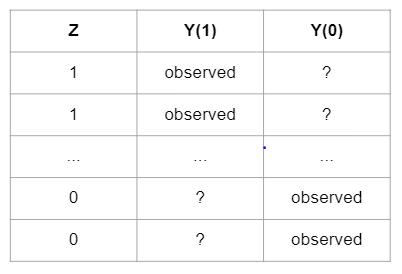

In [36]:
rd2_rbc = X2.merge(outcome2, left_index=True, right_index=True)
treated_rbc = rd2_rbc[rd2_rbc['shecon3'] == 1]
untreated_rbc = rd2_rbc[rd2_rbc['shecon3'] == 0]
untreated_rbc['z_ppvt']

childid
ET010001    0.126715
ET010002    0.207348
ET010004   -0.115184
ET010005    0.126715
ET010006   -0.034551
              ...   
ET200094   -0.195817
ET200095   -0.034551
ET200096   -0.840882
ET200098   -0.115184
ET200099   -0.921515
Name: z_ppvt, Length: 1384, dtype: float64

In [37]:
X_rbc_train, X_rbc_test, y_rbc_train, y_rbc_test = train_test_split(untreated_rbc.iloc[:, :-1], untreated_rbc['z_ppvt'], test_size=0.15)
model_rbc = LinearRegression()
model_rbc.fit(X_rbc_train, y_rbc_train)
model_rbc.score(X_rbc_test, y_rbc_test)

0.17840270400889746

In [38]:
predicted_y_rbc = model_rbc.predict(treated_rbc.iloc[:, :-1])

In [42]:
treated_rbc['pred_z_ppvt'] = predicted_y_rbc

C:\Users\tanvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
treated_rbc['pred_shock_effect'] = treated_rbc['z_ppvt'] - treated_rbc['pred_z_ppvt'] 
treated_rbc

C:\Users\tanvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,zwfa,zhfa,zbfa,caredu,hq_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,shecon3,z_ppvt,pred_z_ppvt,pred_shock_effect
childid,,,,,,,,,,,,,,
ET020025,-0.34,0.25,-0.77,0,0.305556,0.4,1,1,1,0,1,3.110139,0.439112,2.671027
ET020076,-1.38,-1.85,-0.25,28,0.305556,0.2,1,0,1,1,1,-0.518349,0.741712,-1.260061
ET040006,-2.36,-1.92,-1.68,0,0.305556,0.2,1,0,0,0,1,-0.840882,-0.263121,-0.577760
ET040013,-1.09,-1.51,-0.16,0,0.277778,0.2,1,1,1,0,1,-0.518349,0.177154,-0.695503
ET040037,-1.62,-1.30,-1.25,0,0.583333,0.3,1,0,0,0,1,0.207348,-0.023232,0.230580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ET200083,-1.33,-1.47,-0.55,0,0.291667,0.0,0,1,0,0,1,-0.518349,-0.412825,-0.105525
ET200087,-2.50,-0.55,-3.33,0,0.312500,0.0,0,1,0,0,1,0.126715,-0.359989,0.486704
ET200089,-0.70,-0.57,-0.57,0,0.291667,0.0,0,0,0,0,1,-1.324680,-0.355482,-0.969198


In [48]:
# Calculate Average Treatment Effect based on predicted potential outcomes
print('Average Treatment Effect for Treated: ', np.mean(treated_rbc['pred_shock_effect']))

Average Treatment Effect for Treated:  -0.10020556866777286


$ \textbf{Propensity Score Matching} $

In [15]:
# Try implementing propensity score matching to isolate treatment effect
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression(solver='lbfgs', max_iter=500)
log_model.fit(X2.drop('shecon3', axis=1), X2['shecon3'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
prop_scores = log_model.predict_proba(X2.drop('shecon3', axis=1))
prop_scores

array([[0.97904099, 0.02095901],
       [0.86309733, 0.13690267],
       [0.98673975, 0.01326025],
       ...,
       [0.66367553, 0.33632447],
       [0.58170932, 0.41829068],
       [0.75146502, 0.24853498]])

In [18]:
prop_scores[:, 1]

array([0.02095901, 0.13690267, 0.01326025, ..., 0.33632447, 0.41829068,
       0.24853498])

In [19]:
all_rd2 = X2.merge(outcome2, left_index=True, right_index=True)
all_rd2['propensity'] = prop_scores[:, 1]
all_rd2.head()

,zwfa,zhfa,zbfa,caredu,hq_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,shecon3,z_ppvt,propensity
childid,,,,,,,,,,,,,
ET010001,-1.60,-0.78,-1.77,8,0.555556,0.7,1,1,1,1,0,0.126715,0.020959
ET010002,-2.42,-2.24,-1.46,8,0.333333,0.4,1,1,1,0,0,0.207348,0.136903
ET010004,-1.00,-1.91,0.41,10,0.547619,0.4,1,0,1,1,0,-0.115184,0.013260
ET010005,-1.40,-1.31,-0.82,0,0.283333,0.3,1,0,1,0,0,0.126715,0.123098
ET010006,-1.29,-0.57,-1.45,11,0.287037,0.7,0,0,1,1,0,-0.034551,0.020012


In [27]:
treated2 = all_rd2[all_rd2['shecon3'] == 1]
untreated2 = all_rd2[all_rd2['shecon3'] == 0]
untreated2

,zwfa,zhfa,zbfa,caredu,hq_new,cd_new,drwaterq_new,toiletq_new,elecq_new,cookingq_new,shecon3,z_ppvt,propensity
childid,,,,,,,,,,,,,
ET010001,-1.60,-0.78,-1.77,8,0.555556,0.7,1,1,1,1,0,0.126715,0.020959
ET010002,-2.42,-2.24,-1.46,8,0.333333,0.4,1,1,1,0,0,0.207348,0.136903
ET010004,-1.00,-1.91,0.41,10,0.547619,0.4,1,0,1,1,0,-0.115184,0.013260
ET010005,-1.40,-1.31,-0.82,0,0.283333,0.3,1,0,1,0,0,0.126715,0.123098
ET010006,-1.29,-0.57,-1.45,11,0.287037,0.7,0,0,1,1,0,-0.034551,0.020012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ET200094,-2.59,-1.05,-3.16,0,0.571429,0.1,0,1,0,0,0,-0.195817,0.328968
ET200095,0.30,1.30,-0.80,0,0.291667,0.0,0,0,0,0,0,-0.034551,0.269066
ET200096,-2.46,-1.78,-1.87,0,0.527778,0.0,1,0,0,0,0,-0.840882,0.277948


In [21]:
prop = treated2['propensity']['ET020025']
differences = np.abs(untreated2['propensity'] - prop)
matched_sample = np.argmin(differences)
treatment_effect = treated2['z_ppvt']['ET020025'] - untreated2['z_ppvt'][matched_sample]

C:\Users\tanvi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [22]:
att_data = pd.DataFrame(columns=['treated_id', 'treated_prop', 'untreated_id', 'untreated_prop', 'treatment_effect'])
for childid in treated2.index:
    prop = treated2['propensity'][childid]
    differences = np.abs(untreated2['propensity'] - prop)
    matched_sample = np.argmin(differences)
    treatment_effect = treated2['z_ppvt'][childid] - untreated2['z_ppvt'][matched_sample]
    
    child_data = pd.DataFrame({'treated_id': [childid], 'treated_prop': [prop],
                               'untreated_id': [matched_sample], 'untreated_prop': [untreated2['propensity'][matched_sample]],
                               'treatment_effect':[treatment_effect]})
    att_data = att_data.append(child_data)
    untreated2.drop(matched_sample, axis=0)
    

In [23]:
att_data

,treated_id,treated_prop,untreated_id,untreated_prop,treatment_effect
0,ET020025,0.131217,ET100093,0.131210,3.870388
0,ET020076,0.014146,ET030100,0.014232,-1.451395
0,ET040006,0.380285,ET070004,0.380213,-1.209496
0,ET040013,0.133035,ET140058,0.133026,-1.370762
0,ET040037,0.299147,ET200005,0.299125,0.806331
...,...,...,...,...,...
0,ET200083,0.335617,ET120053,0.335902,0.564432
0,ET200087,0.369885,ET150096,0.369984,0.161266
0,ET200089,0.303308,ET170063,0.303556,-1.209496
0,ET200097,0.233371,ET070029,0.233276,0.161266


In [24]:
print('Average Treatment Effect for Treated: ', np.mean(att_data['treatment_effect']))

Average Treatment Effect for Treated:  -0.051835547886195155


In [25]:
smds = {}
for column in treated2.columns[:-3]:
    print(column)
    smd = (np.mean(untreated2[column]) - np.mean(treated2[column]))/ (((np.var(untreated2[column]) + np.var(treated2[column]))/2)**0.5)
    smds[column] = smd

zwfa
zhfa
zbfa
caredu
hq_new
cd_new
drwaterq_new
toiletq_new
elecq_new
cookingq_new


In [26]:
smds

{'zwfa': 0.21897366950212693,
 'zhfa': 0.20945132375865513,
 'zbfa': 0.07119295703350044,
 'caredu': 0.20724768591304568,
 'hq_new': 0.6341833550558829,
 'cd_new': 0.5184583457156938,
 'drwaterq_new': 0.25673971816433766,
 'toiletq_new': 0.19762524491111888,
 'elecq_new': 0.8382561143386986,
 'cookingq_new': 0.48353280782540925}